In [458]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_ride_df = pd.merge(ride_data_df, city_data_df, how = "left", on = 'city')


# Display the data table for preview
city_ride_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

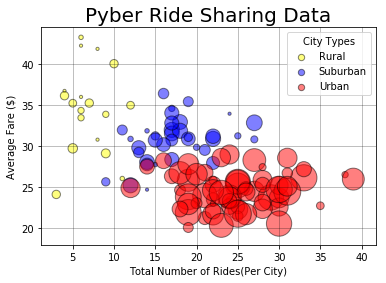

In [459]:
# Obtain the x and y coordinates for each of the three city types
rural_x_axis = city_ride_df[city_ride_df['type']=="Rural"].groupby('city')['fare'].count()
rural_y_axis = city_ride_df[city_ride_df['type']=="Rural"].groupby('city')['fare'].mean()

suburb_x_axis = city_ride_df[city_ride_df['type']=="Suburban"].groupby('city')['fare'].count()
suburb_y_axis = city_ride_df[city_ride_df['type']=="Suburban"].groupby('city')['fare'].mean()

urban_x_axis = city_ride_df[city_ride_df['type']=="Urban"].groupby('city')['fare'].count()
urban_y_axis = city_ride_df[city_ride_df['type']=="Urban"].groupby('city')['fare'].mean()

# Build the scatter plots for each city types
fig, ax = plt.subplots()
ax.scatter(rural_x_axis, rural_y_axis, marker = 'o' , color = 'yellow', alpha = 0.5, edgecolor = 'black', label = 'Rural', s = driver_count_rural * 10)
ax.scatter(suburb_x_axis, suburb_y_axis, marker = 'o', color = 'blue', alpha = 0.5, edgecolors = 'black', label = 'Suburban', s = driver_count_suburb * 10)
ax.scatter(urban_x_axis, urban_y_axis, marker = 'o', color = 'red' , alpha = 0.5, edgecolor = 'black', label = 'Urban', s = driver_count_urban * 10)
ax.grid(linestyle='-', linewidth='0.5', color='black', alpha = 0.5)

# Incorporate the other graph properties
plt.xlabel("Total Number of Rides(Per City)", Fontsize = 10)
plt.ylabel("Average Fare ($)", Fontsize = 10)
plt.title("Pyber Ride Sharing Data", Fontsize = 20)

# Create a legend
lgnd = ax.legend(title = "City Types", loc = 'best')
for legend in lgnd.legendHandles:
    legend.set_sizes([40])

# Incorporate a text label regarding circle size
driver_count_rural = city_ride_df[city_ride_df['type']=="Rural"].groupby('city')['driver_count'].sum()/city_ride_df[city_ride_df['type']=="Rural"].groupby('city')['driver_count'].count()
driver_count_suburb = city_ride_df[city_ride_df['type']=="Suburban"].groupby('city')['driver_count'].sum()/city_ride_df[city_ride_df['type']=="Suburban"].groupby('city')['driver_count'].count()
driver_count_urban = city_ride_df[city_ride_df['type']=="Urban"].groupby('city')['driver_count'].sum()/city_ride_df[city_ride_df['type']=="Urban"].groupby('city')['driver_count'].count()

# Save Figure
plt.savefig("../Images/Pyber Ride Sharing Data.png")

In [460]:
# Show Figure
plt.show()

## Total Fares by City Type

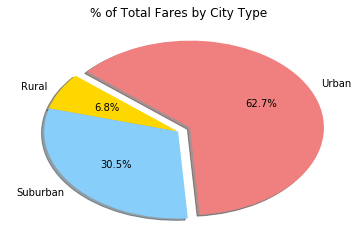

In [461]:
# Calculate Type Percents
total_fares = city_ride_df.groupby('type')['fare'].sum().sum()
percent_fare_city = city_ride_df.groupby('type')['fare'].sum()/total_fares * 100

# Build Pie Chart
labels = ['Rural', 'Suburban', 'Urban']
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = (0, 0, 0.1)
plt.pie(percent_fare_city, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("../Images/% of Total Fares by City Type.png")

In [462]:
# Show Figure
plt.show()

## Total Rides by City Type

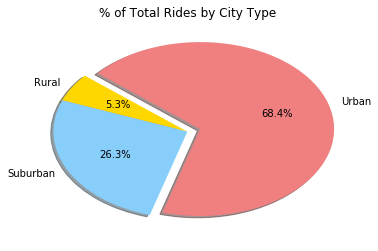

In [463]:
# Calculate Ride Percents
total_rides = city_ride_df.groupby('type')['ride_id'].count().sum()
percent_rides_city = city_ride_df.groupby('type')['ride_id'].count()/total_rides * 100

# Build Pie Chart
labels = ['Rural', 'Suburban', 'Urban']
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = (0, 0, 0.1)
plt.pie(percent_rides_city, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("../Images/% of Total Rides by City Type.png")

In [464]:
# Show Figure
plt.show()

## Total Drivers by City Type

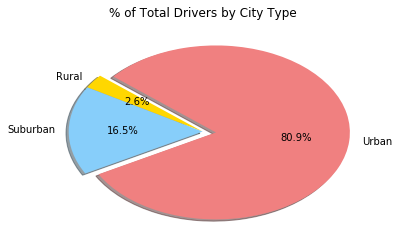

In [465]:
# Calculate Driver Percents
total_drivers = city_ride_df.drop_duplicates('city').groupby('type')['driver_count'].sum().sum()
percent_drivers_city = city_ride_df.drop_duplicates('city').groupby('type')['driver_count'].sum()/total_drivers * 100

# Build Pie Chart
labels = ['Rural', 'Suburban', 'Urban']
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = (0, 0, 0.1)
plt.pie(percent_drivers_city, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("../Images/% of Total Drivers by City Type.png")

In [466]:
# Show Figure
plt.show()